In [1]:
import netCDF4 as nc
import xarray as xr
# https://towardsdatascience.com/read-netcdf-data-with-python-901f7ff61648

In [6]:
#category = 'model driver data'
#fn = 'noaagefs_meteo_driver_files/final_noaa_gefs_CONUS_2021-05-25_00_forecast_segments.nc'

category = 'model predictions'
fn = 'forecast_pgdl_da_outputs\PGDL-DA\\forecast[2021-04-16]_files\\f5910324-cbd3-11ec-80e4-a4bf014516d6_DA_forecast[2021-04-16]_release[0_cfs].nc'

nc_loc = os.path.join('.', 'data', category, fn) 

In [8]:
xr_ds  = xr.open_dataset(nc_loc)
xr_ds

<xarray.Dataset>
Dimensions:            (issue_time: 1, time: 8, seg_id_nat: 70, ensemble: 3100)
Coordinates:
  * issue_time         (issue_time) datetime64[ns] 2021-04-16
  * time               (time) int32 0 1 2 3 4 5 6 7
  * seg_id_nat         (seg_id_nat) int32 1435 1436 1437 1438 ... 1645 1649 1652
  * ensemble           (ensemble) int32 1 2 3 4 5 6 ... 3096 3097 3098 3099 3100
Data variables:
    max_temp           (ensemble, seg_id_nat, time, issue_time) float32 ...
    data_assimilation  (issue_time) float32 ...
Attributes:
    file_description:       f5910324-cbd3-11ec-80e4-a4bf014516d6_DA_forecast[...
    forecast_iteration_id:  2021-04-16_c693fb89-2d94-43f3-b5e7-211de5f7333b
    forecast_model_id:      forecast-pgdl-da_v1.0_DA
    forecast_project_id:    forecast-pgdl-da
    n_parameters:           2579
    n_drivers:              14

In [11]:
var = 'time'
xr_ds[var]

<xarray.DataArray 'time' (time: 8)>
array([0, 1, 2, 3, 4, 5, 6, 7])
Coordinates:
  * time     (time) int32 0 1 2 3 4 5 6 7
Attributes:
    units:      1 day
    long_name:  forecast valid time

In [5]:
#xr_ds[var].values

In [6]:
print(xr_ds[var].min())
print(xr_ds[var].max())

<xarray.DataArray 'tmmn' ()>
array(-25.96428887)
<xarray.DataArray 'tmmn' ()>
array(82.4782093)


In [7]:
var_plot = xr_ds[var].sel(seg_id_nat=2047)
#var_plot = xr_ds[var].isel(seg_id_nat=0)
var_plot.plot()

KeyError: 'seg_id_nat is not a valid dimension or coordinate'

NameError: name 'longitude' is not defined

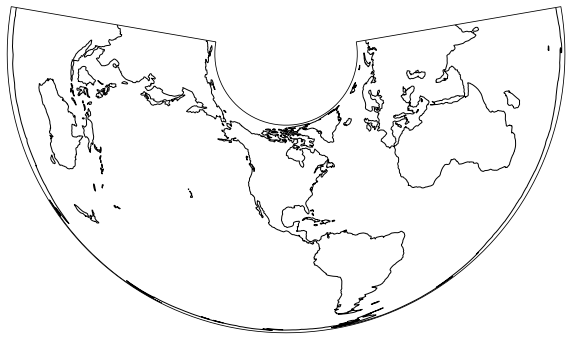

In [125]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib.pyplot as plt

# Create a spatial map of your selected location with cartopy

# Set the spatial extent to cover the CONUS (Continental United States)
extent = [-120, -70, 24, 50.5]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

# Create your figure and axis object
# Albers equal area is a common CRS used to make maps of the United States
f, ax = plt.subplots(figsize=(12, 6),
                     subplot_kw={'projection': ccrs.AlbersEqualArea(central_lon, central_lat)})
ax.coastlines()
# Plot the selected location
ax.plot(longitude-360, latitude, 
        '*', 
        transform=ccrs.PlateCarree(),
        color="purple", 
        markersize=10)

ax.set_extent(extent)
ax.set(title="Location of the Latitude / Longitude Being Used To to Slice Your netcdf Climate Data File")

# Adds continent boundaries to the map
ax.add_feature(cfeature.LAND, edgecolor='black')

ax.gridlines()
plt.show()

In [6]:
ds = nc.Dataset(nc_loc)
print(ds.variables.values())

dict_values([<class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    units: days since 1979-01-01
    long_name: time
unlimited dimensions: 
current shape = (15800,)
filling on, default _FillValue of -2147483647 used, <class 'netCDF4._netCDF4.Variable'>
int32 seg_id_nat(seg_id_nat)
    long_name: PRMS-SNTemp stream segment id national
unlimited dimensions: 
current shape = (456,)
filling on, default _FillValue of -2147483647 used, <class 'netCDF4._netCDF4.Variable'>
int32 ens(ens)
    long_name: ensemble member
unlimited dimensions: 
current shape = (1,)
filling on, default _FillValue of -2147483647 used, <class 'netCDF4._netCDF4.Variable'>
float32 seg_rain(ens, seg_id_nat, time)
    units: meters
    _FillValue: 1e+32
    long_name: Area-weighted average rainfall for each segment from HRUs contributing flow to the segment
unlimited dimensions: 
current shape = (1, 456, 15800)
filling on, <class 'netCDF4._netCDF4.Variable'>
float32 seg_tave_air(ens, seg_id_nat, time)
    units: degree

dict_values([<class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    units: days since 1979-01-01
    long_name: time
unlimited dimensions: 
current shape = (15800,)
filling on, default _FillValue of -2147483647 used, <class 'netCDF4._netCDF4.Variable'>
int32 seg_id_nat(seg_id_nat)
    long_name: PRMS-SNTemp stream segment id national
unlimited dimensions: 
current shape = (456,)
filling on, default _FillValue of -2147483647 used, <class 'netCDF4._netCDF4.Variable'>
int32 ens(ens)
    long_name: ensemble member
unlimited dimensions: 
current shape = (1,)
filling on, default _FillValue of -2147483647 used, <class 'netCDF4._netCDF4.Variable'>
float32 seg_rain(ens, seg_id_nat, time)
    units: meters
    _FillValue: 1e+32
    long_name: Area-weighted average rainfall for each segment from HRUs contributing flow to the segment
unlimited dimensions: 
current shape = (1, 456, 15800)
filling on, <class 'netCDF4._netCDF4.Variable'>
float32 seg_tave_air(ens, seg_id_nat, time)
    units: degree

In [ ]:
var = ''
# https://stackoverflow.com/questions/36360469/read-nc-netcdf-files-using-python
from matplotlib import pyplot as plt # import libraries
plt.imshow(nc[var]) 
plt.show()